# Visualization tips and tricks

## Choose an informative plots for categorical data

In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Bar plots

What if we want a bar graph of Sepal Length by Species?

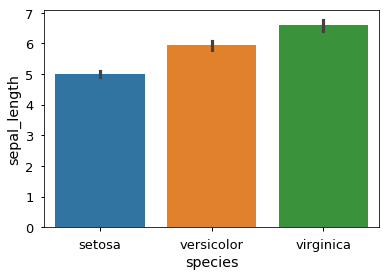

In [2]:
%matplotlib inline

sns.set_context('notebook', font_scale=1.3)
sns.barplot(x='species', y='sepal_length', data=iris)

As you can see, it is a bit cumbersome to create barplots of means with ggplot
(you need to add `stat='summary', fun.y='mean'`). The default behavior of
`geom_bar` is to count observations instead of summarize them, which actually is
a more appropriate use of a barplot for reasons that we will cover below.

### Violin plots

Text(0.5,0,'')

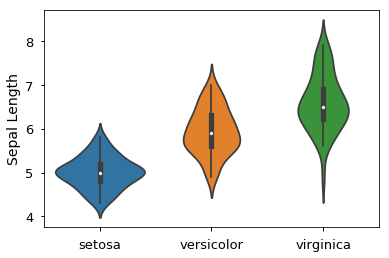

In [3]:
ax = sns.violinplot(x='species', y='sepal_length', data=iris)
ax.set_ylabel('Sepal Length', fontsize=14)
ax.set_xlabel('')
# ax.set_xticklabels(fontsize=20)

### Box plots

We can use boxplots to visualize the distribution Sepal Length within each
species:

Text(0.5,0,'')

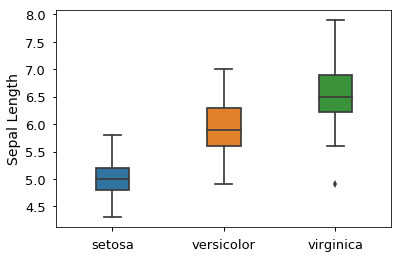

In [4]:
ax = sns.boxplot(x='species', y='sepal_length', data=iris, width=0.3)
ax.set_ylabel('Sepal Length', fontsize=14)
ax.set_xlabel('')

### Swarm plots

We can use swarmplots to visualize the distribution Sepal Length within each
species:

Text(0.5,0,'')

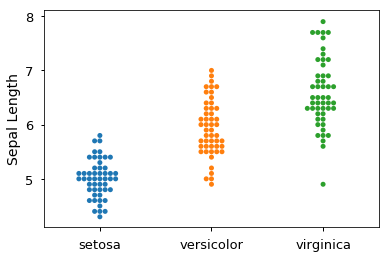

In [5]:
ax = sns.swarmplot(x='species', y='sepal_length', data=iris)
ax.set_ylabel('Sepal Length', fontsize=14)
ax.set_xlabel('')

#### Challenge

Out of the these plots, which one do you think is the most
informative and why? Which is the most true to the underlying data and how
would you know this?

### Pros and cons of different graph types

We will deepen the discussion around some of these ideas, in the context of the
following plot:

![*Reproduced with permission from [Dr. Koyama's poster*](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/TatsukiKoyama/Poster3.pdf)](./image/dynamite-bars.png)

Similar to the ideas of Tufte, it is generally advisable to avoid "decorative"
plot elements that do not convey extra information about the data, *especially*
when such elements hide the real data. For example, in the rectangles that make
up these bars, the only relevant information is given by the where the
rectangles ends on the y-axis, the rest of it is unnecessary and you could just
have used a marker (circle, square, etc) to indicate the height on the y-axis
instead. Note that the body of the rectangle is not representative for where the
data lies, there are probably no data points close to 0, and several above the
rectangle.

Barplots are especially misleading when used as data summaries, as in the
example above. In a summary plot, only two distribution parameters (a measure of
central tendency, e.g. the mean, and error, e.g. the standard deviation or a
confidence interval) are displayed, instead of showing all the individual data
points. This can be highly misleading, since different underlying distributions
can give rise to the same summary plot just as when we previously discussed that
the different distributions from the datasaurus R-package can give rise to [the
same linear regression coefficients](
https://uoftcoders.github.io/rcourse/lec11-modelling.html#challenge17).
We also have no idea of how many observations there are in each group. These
shortcomings become evident when comparing the barplot to the underlying
distributions that were used to create them:

![*Reproduced with permission from [Dr.
Koyama's poster*](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/TatsukiKoyama/Poster3.pdf)](./image/dynamite-vs-dists.png)

Immediately, you can see that conclusions drawn from the barplot, such that A
and B have the same outcome, are factually incorrect. The distribution in D is
bimodal, so representing that with a mean would be like observing black and
white birds and conclude that the average bird color is grey, it's nonsensical.
If we would have planned our follow up experiments based on the barplot alone,
we would have been setting ourselves up for failure! Always be sceptical when
you see a barplot in a published paper, and think of how the underlying
distribution might look (note that barplots are more acceptable when used to
represents counts, proportion or percentages, where there is only one data point
per group in the data set).

Boxplots and violin plots are more meaningful data summaries as they represent
more than just two distribution parameters. However, these can still be
misleading and it is often the most appropriate to show each individual
observation with a dot/hive/swarm plot, possibly combined with with a
superimposed summary plot or a marker for the mean or median *if* you think this
conveys additional information. One exception, when it is not advisable to show
all data points, is when your data set is gigantic and plotting each individual
observation would oversaturate the chart. Here, you are forced to show summary
plots or a 2D histogram.

Here is an example of how you can plot a violinplot, together with the individual
observations:

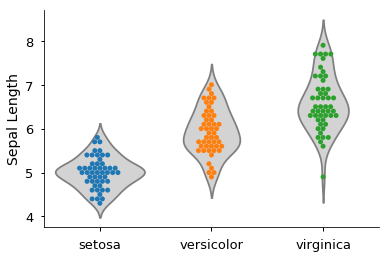

In [6]:
ax = sns.violinplot(x='species', y='sepal_length', data=iris, color='lightgrey', inner=None)
ax = sns.swarmplot(x='species', y='sepal_length', data=iris) 
ax.set_ylabel('Sepal Length', fontsize=14)
ax.set_xlabel('')
sns.despine()

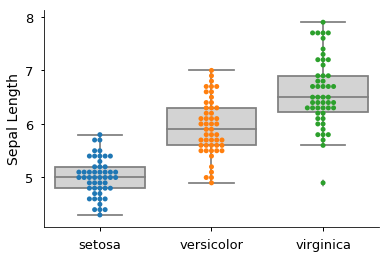

In [7]:
ax = sns.boxplot(x='species', y='sepal_length', data=iris, color='lightgrey')
ax = sns.swarmplot(x='species', y='sepal_length', data=iris) 
ax.set_ylabel('Sepal Length', fontsize=14)
ax.set_xlabel('')
sns.despine()

Notice how the boxplot layer is behind the jitter layer? What do you need to
change in the code to put the boxplot in front of the points such that it's not
hidden?

#### Challenge

So far, we've looked at the distribution of sepal length within species.  Try
making a new plot to explore the distribution of another variable within each
species.

What about making interactive graphs in R? There is a package called plotly that
lets us make our ggplot2 graphs interactive:

```{r}
library(plotly)

g <- ggplot(iris, aes(x = Species, y = Sepal.Length)) +
    geom_bar(stat='summary', fun.y='mean')
p <- ggplotly(g)
p
```

#### Challenge

Create another type of interactive graph (i.e. not a bar graph) using these
data. What kinds of graphs might interactivity add or improve the
communication and clarity of your message to?

# Changing plot appearance

## Making good graphs

### What makes a good graph?

#### Challenge

What makes a bad graph? What makes an ugly graph to you?

### Components of a graph: The data

There are many considerations to take into account when creating a graph.

Data types:

* Nominal (labels without quantitative values)
* Ordinal (the order of the values is what’s important, but the magnitude of
  difference between each value is not really known)
* Interval (interval scales are numeric scales in which we know not only the
  order, but also the exact differences between the values)
* Ratio (same properties as interval scales but with an absolute zero, e.g.
  height)

And data features:

* Scalar (simple magnitude or quantity)
* Vector (magnitude and direction)
* Tensor (vectors + other attributes)

Ask: "what kind of data/information is it?"

* What type?
* Numerical?
* Spatial?
* How many dimensions?
* Nominal/categorical?
* Narrative?

### Tufte's guidelines

* Reduce non-data ink
* Enhance the data ink

Reduces the proportion of graphic’s ink devoted to the non-redundant display of
data-information.

Avoid "chartjunk" - extraneous visual elements that detract from message.

Visual Attribute    | Non-Data | Data
--------------------|----------|-------
Line Thickness      | Thin     | Thick
Size                | Small    | Big
Brightness Contrast | Decrease | Increase
Colour Saturation   | Decrease | Increase

[More on Edward Tufte](https://www.edwardtufte.com/tufte/)

### Colour rules

* Large background colours should be quiet, muted to let brighter colors stand out
* To highlight some element of a figure, using a bright colour can be effective
* However, if brightly colouring this aspect of your figure serves no purpose,
  leave it greyscale/plain
* Here is a reference sheet with all the [colours and colour names in
  R](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf)

### Summary

* Determine what type of data you have and how your data will be used
* Determine how many variable types are in your data
* Decide on a visual treatment for each of the variables 
* Focus on the data in your visual representation

### More general resources on plotting

* [Ten Simple Rules for Better Figures](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)
* [Finding the Right Color Palettes for Data Visualizations](https://blog.graphiq.com/finding-the-right-color-palettes-for-data-visualizations-fcd4e707a283)
* [Cookbook for R - Graphs](http://www.cookbook-r.com/Graphs/)
* [ggplot cheatsheet - very useful!](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* [Examples of bad graphs](https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/)
* [More examples of bad graphs and how to improve them](https://www.stat.auckland.ac.nz/~ihaka/120/Lectures/lecture03.pdf)
* [Wikipedia has a great article on misleading graphs](https://en.wikipedia.org/wiki/Misleading_graph)

## Matplotlib plotting and general plot customization

The knowledge of how to make an appealing and informative visualization can be put into practice by working directly with `matplotlib`, and styling different elements of the plot. This is how simplistic plotting looks in matplotlib:

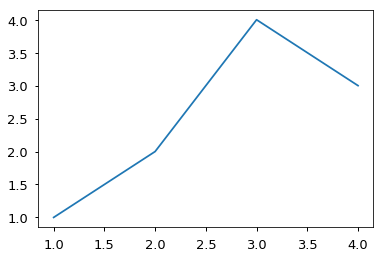

In [8]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 2, 4, 3]
plt.plot(x, y)

The default is a lineplot, to get a scatter plot use `plt.scatter`.

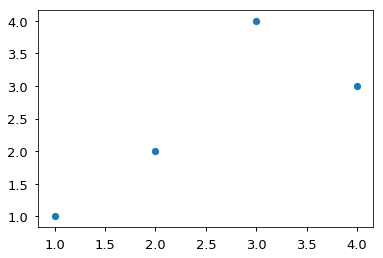

In [9]:
plt.scatter(x, y)

You can also combine the plots together.

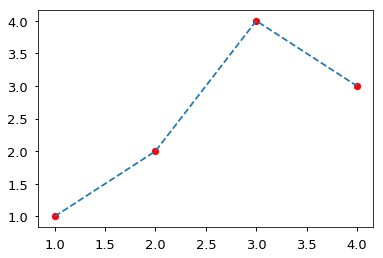

In [10]:
plt.scatter(x, y, color='red')
plt.plot(x, y, linestyle='dashed')

Often we will want to modify the plot after it is created, e.g. adding a title or label the axis. Or maybe we will want to create several subplots togheter. For all of these operations, it is easier to use the object oriented plotting interface, where you initially create the empty figure, assign the axes (subplots) to variable names and then explicitly use these axes variable names for plotting.

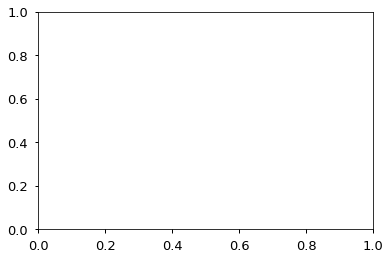

In [11]:
# An empty plot
fig, ax = plt.subplots(1, 1) # number of rows and columns

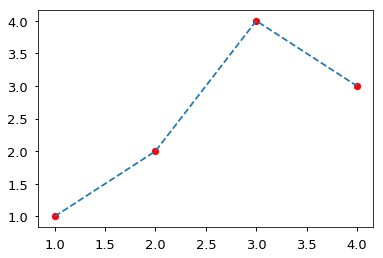

In [12]:
# Use the variable name `ax` explicitly
fig, ax = plt.subplots() # 1, 1 is the default here
ax.scatter(x, y, color='red')
ax.plot(x, y, linestyle='dashed')

Normally we don't plot data in simple lists like above, but rather we want to plot data frames (spreadsheet format data). We could simply pass the individual columns as `x` and `y`.

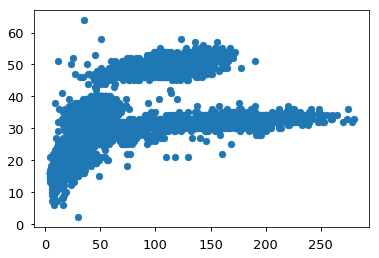

In [13]:
import pandas as pd

surveys = pd.read_csv('surveys.csv')
fig, ax = plt.subplots()
ax.scatter(surveys['weight'], surveys['hindfoot_length'])

But the plotting functions also takes a `data` argument which makes them aware of that there is a data framed passed, and then uses many of the other arguments as names of columns in the data frame.

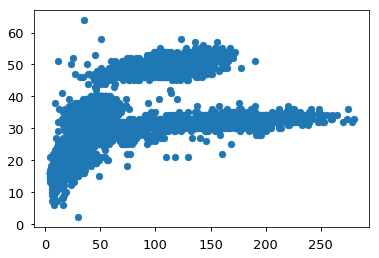

In [14]:
fig, ax = plt.subplots()
ax.scatter('weight', 'hindfoot_length', data=surveys)

With this syntax, it is easy for use to create figures consisting of several axes.

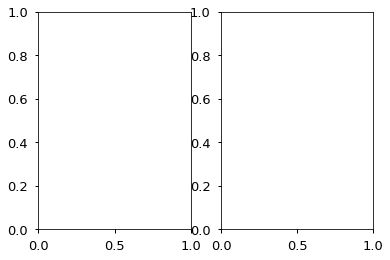

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)

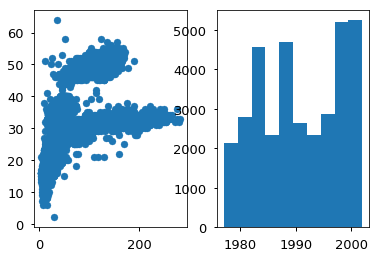

In [16]:
# teach constrained_layout or plt.tight_layout?
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter('weight', 'hindfoot_length', data=surveys)
ax2.hist('year', data=surveys); # ; supress output, histogram returns the bins

We can ensure that there are no overlapping labels in the plot by setting the layout of the figure. Let's also add a few more bins to the histogram to make it better represent the underlying data.

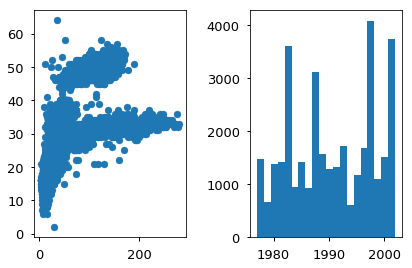

In [17]:
# teach constrained_layout or plt.tight_layout?
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter('weight', 'hindfoot_length', data=surveys)
ax2.hist('year', data=surveys, bins=20); # ; supress output, histogram returns the bins
fig.tight_layout()

Now, let's change the figure size and add a few labels like above.

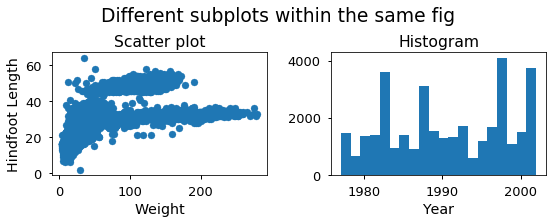

In [18]:
# teach constrained_layout or plt.tight_layout?
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.scatter('weight', 'hindfoot_length', data=surveys)
ax2.hist('year', data=surveys, bins=20); # ; supress output, histogram returns the bins

ax1.set_title('Scatter plot')
ax1.set_ylabel('Hindfoot Length')
ax1.set_xlabel('Weight')

ax2.set_title('Histogram')
ax2.set_xlabel('Year')

fig.suptitle('Different subplots within the same fig', y=1.05)
fig.tight_layout()

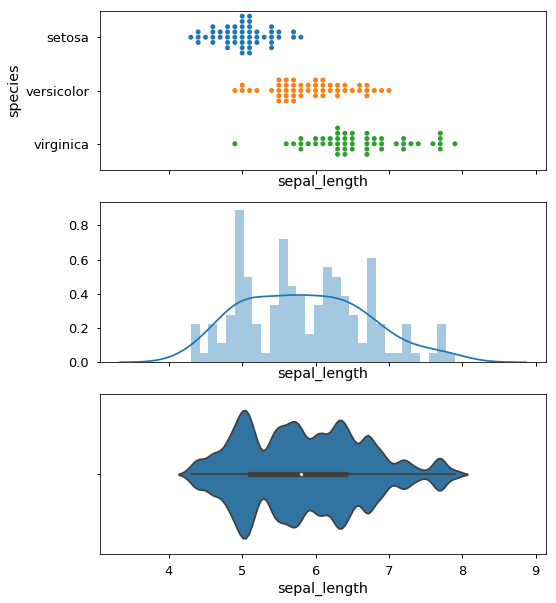

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(8, 10))

sns.swarmplot('sepal_length', 'species', data=iris, ax=ax1)
sns.distplot(iris['sepal_length'], bins=30, ax=ax2)
sns.violinplot(iris['sepal_length'], ax=ax3, bw=0.1)


In [20]:
# TODO add a few seaborn plots and show how they can be custumized with matplotlib (and also seaborn palettes)

## Avoid oversaturated plots

In [21]:
diamonds = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv', index_col=0)
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### Oversaturated graphs and plot choice

Last week we talked about how summary plots (especially bar plots) can sometimes
be misleading, and it is often most appropriate/ideal to show every individual
observation with a dot plot or the like, perhaps combined with summary markers
where appropriate. But, as we discussed last week, what if you have a gigantic
data set with a zillion observations? In large data sets, it is often the case
that plotting each individual observation would oversaturate the chart. 

Let's actually take a look at an oversaturated chart using one of the native
datasets, `diamonds`:

```{r}
ggplot(diamonds, aes(x = carat, y = price)) + 
  geom_point()
```

Because this is a dataset with 53940 observations and we are plotting it on two
dimensions, the resulting graph is incredibly oversaturated. Oversaturated
graphs make it *far more* difficult to glean information from the visualization.
We're going to get into a few last methods of dealing with this problem.

First, let's try making a 2D hexagonal heatmap (really a fancy histogram) with
our huge diamonds dataset. 

(It might seem like we're skipping ahead in terms of graph complexity. To learn
how to make a super simple histogram with simple count data, see
[here](http://ggplot2.tidyverse.org/reference/geom_histogram.html))

```{r}
g <- ggplot(diamonds, aes(x = carat, y = price))
g + 
  geom_hex()
```

What has this changed? Now we have a handy legend to the right of our graph
indicating the density of points across 2D space in our large dataset. We've
created our first heat map.

Wikipedia's definition of a heat map:

["A heat map (or heatmap) is a graphical representation of data where the
individual values contained in a matrix are represented as
colors."](https://en.wikipedia.org/wiki/Heat_map)

We've now added additional information to our graph and solved the saturation
problem we encountered in our first graph. If you want to change the bin size
(i.e. the size of the hexagons), you can do so as such:

```{r}
g <- ggplot(diamonds, aes(x = carat, y = price))
g + 
  geom_hex(bins = 90)
```

[Here](http://ggplot2.tidyverse.org/reference/geom_hex.html) are more resources
on hexagonal 2D heatmaps. 


[Documentation for square/rectangular heat maps of 2D bin
counts](http://ggplot2.tidyverse.org/reference/geom_bin2d.html)

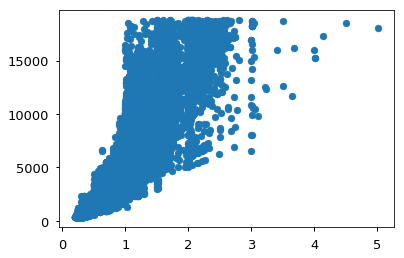

In [22]:
plt.scatter('carat', 'price', data=diamonds)

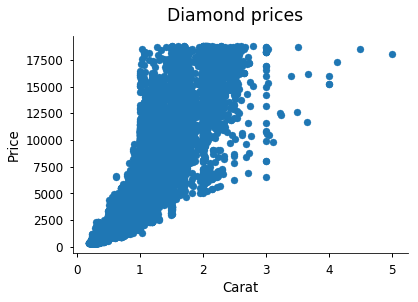

In [23]:
sns.set_context('notebook', font_scale=1.2)
# sns.set_style('white')
# sns.set(context=None, style=None, palette=None)

fig, ax = plt.subplots()
fig.suptitle('Diamond prices')
ax.scatter('carat', 'price', data=diamonds)
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
sns.despine()
# Same as
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

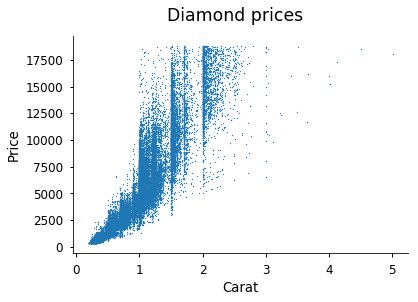

In [24]:
fig, ax = plt.subplots()

fig.suptitle('Diamond prices')

ax.scatter('carat', 'price', data=diamonds, s=1)
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
sns.despine()

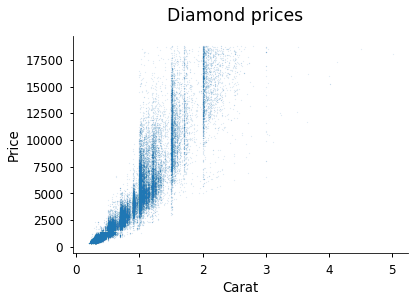

In [25]:
fig, ax = plt.subplots()

fig.suptitle('Diamond prices')
ax.scatter('carat', 'price', data=diamonds, s=1, alpha=0.1)
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
sns.despine()

Make a 2D or joint histogram. Each bin is colored to display the number of data points within it.

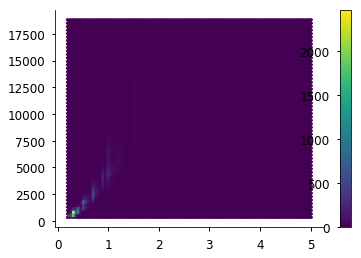

In [26]:
fig, ax = plt.subplots()
hexdata = ax.hexbin('carat', 'price', data=diamonds)
plt.colorbar(hexdata)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
sns.despine()
# ax.set_xlabel('Carat')
# ax.set_ylabel('Price')

There needs to be space for this colorbar. By default it will take space from the current plot/axes. Note the hexbin plot became smaller now that we added the colorbar.

Text(0,0.5,'Price')

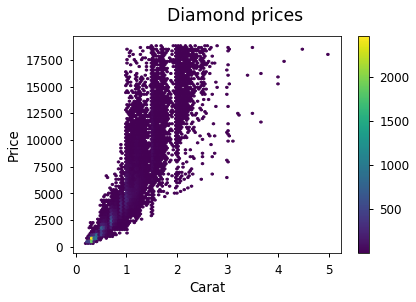

In [27]:
# also include colorbar?
fig, ax = plt.subplots()

fig.suptitle('Diamond prices')
hex_plot = ax.hexbin('carat', 'price', data=diamonds, mincnt=1)
cax = fig.colorbar(hex_plot)
# ax.set_xlabel('Carat')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
cax.set_label('Numbers')

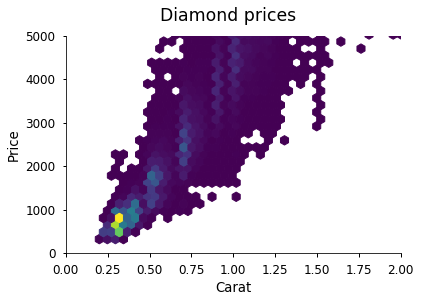

In [28]:
fig, ax = plt.subplots()

fig.suptitle('Diamond prices')
hexbin = ax.hexbin('carat', 'price', data=diamonds, mincnt=1)
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_xlim(0, 2)
ax.set_ylim(0, 5000)

sns.despine()

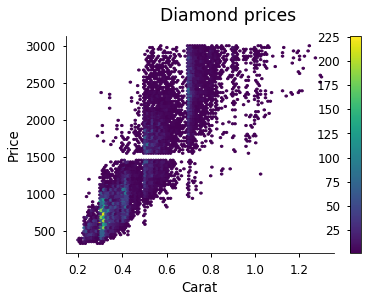

In [29]:
fig, ax = plt.subplots()

fig.suptitle('Diamond prices')
diamonds_subset = diamonds.loc[(diamonds['carat'] < 1.5) & (diamonds['price'] < 3000)]
hexbin = ax.hexbin('carat', 'price', data=diamonds_subset, mincnt=1)
fig.colorbar(hexbin)
ax.set_xlabel('Carat')
ax.set_ylabel('Price')

sns.despine()

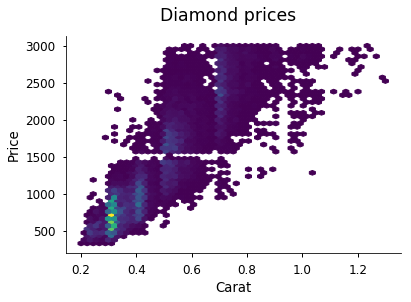

In [30]:
fig, ax = plt.subplots()

fig.suptitle('Diamond prices')
diamonds_subset = diamonds.loc[(diamonds['carat'] < 1.5) & (diamonds['price'] < 3000)]
hexbin = ax.hexbin('carat', 'price', data=diamonds_subset, mincnt=1, gridsize=50) # number of x-grids
ax.set_xlabel('Carat')
ax.set_ylabel('Price')

sns.despine()

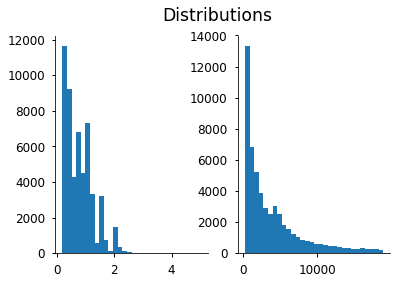

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Distributions')

ax1.hist('carat', bins=30, data=diamonds) 
ax2.hist('price', bins=30, data=diamonds) 
# ax.set_xlabel('Carat')
# ax.set_ylabel('Price')
sns.despine()

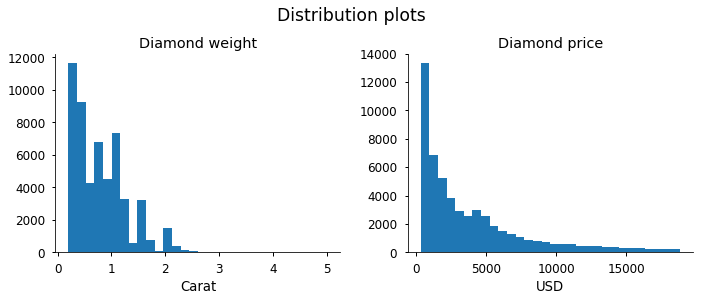

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle('Distribution plots', y=1.05)

ax1.hist('carat', bins=30, data=diamonds) 
ax1.set_title('Diamond weight')
ax1.set_xlabel('Carat')

ax2.hist('price', bins=30, data=diamonds) 
ax2.set_title('Diamond price')
ax2.set_xlabel('USD')

fig.tight_layout()
sns.despine()

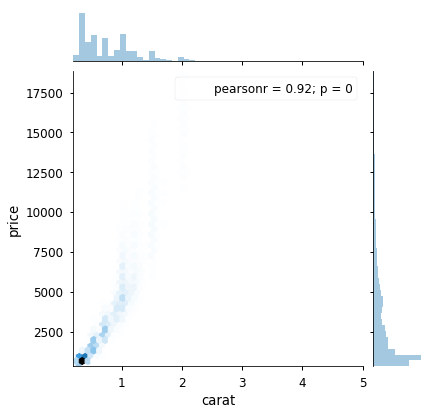

In [33]:
sns.jointplot('carat', 'price', diamonds, kind='hex')

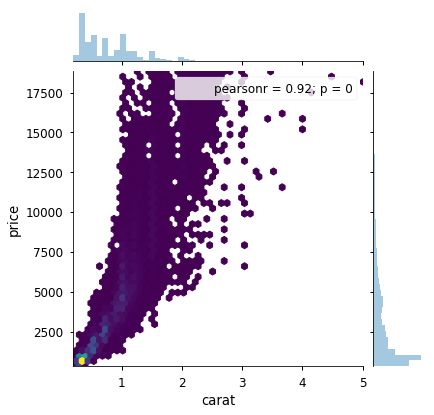

In [34]:
sns.jointplot('carat', 'price', diamonds, kind='hex', joint_kws={'cmap':'viridis', 'mincnt':1, 'gridsize':50})

## Color guidelines

### Colour rules

* Large background colours should be quiet, muted to let brighter colors stand
  out
* To highlight some element of a figure, using a bright colour can be effective
* However, if brightly colouring this aspect of your figure serves no purpose,
  leave it greyscale/plain
* Here is a reference sheet with all the [colours and colour names in
  R](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf)

### Summary

* Determine what type of data you have and how your data will be used
* Determine how many variable types are in your data
* Decide on a visual treatment for each of the variables 
* Focus on the data in your visual representation


### Saving graphs (TODO incldue this and rewrite)

When using ggsave, R by default saves the last graph you plotted. You can also
use the GUI to export and save as an image or PDF.

```{r, eval=FALSE}
ggsave("filename.jpg")
ggsave("filename.jpg", width = 20, height = 20, units = "cm")
```

One quirk about RStudio is that if you don't specify the size of the graph,
ggsave will save the graph as the same size as it appears in your plots window.
This may or may not be what you want.

Try saving this graph:
```{r}
ggplot(iris, aes(x = Sepal.Width, y = Sepal.Length, color = Species)) + 
    geom_point()
```

## Making your graphs accessible

### Choice of colors

Colour blindness is common in the population, and red-green colour blindness in
particular affects 8% of men and 0.5% of women. Guidelines for making your
visualizations more accessible to people affected by colour blindness, will in
many cases also improve the interpretability of your graphs for people who have
standard color vision. Here are a couple of examples:

Don't use jet rainbow-coloured heatmaps. Jet colourmaps are often the default
heatmap used in many visualization packages (you've probably seen them before). 

![](./image/heatmap.png)

Colour blind viewers are going to have a difficult time distinguishing the
meaning of this heat map if some of the colours blend together.

![](./image/colourblind.png)

The jet colormap should be avoided for other reasons, including that the sharp
transitions between colors introduces visual threshold levels that do not
represent the underlying continuous data. Another issue is luminance, or
brightness. For example, your eye is drawn to the yellow and cyan regions,
because the luminance is higher. This can have the unfortunate effect of
highlighting features in your data that don't actually exist, misleading your
viewers! It also means that your graph is not going to translate well to
greyscale in publication format.

More details about jet can be found in [this blog
post](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/) and
[this series of
posts](https://mycarta.wordpress.com/2012/05/12/the-rainbow-is-dead-long-live-the-rainbow-part-1/).
In general, when presenting continuous data, a perceptually uniform colormap is
often the most suitable choice. This type of colormap ensures that equal steps
in data are perceived as equal steps in color space. The human brain perceives
changes in lightness as changes in the data much better than, for example,
changes in hue. Therefore, colormaps which have monotonically increasing
lightness through the colormap will be better interpreted by the viewer. More
details and examples of such colormaps are available in the [matplotlib
documentation](http://matplotlib.org/users/colormaps.html), and many of the core
design principles are outlined in [this entertaining
talk](https://www.youtube.com/watch?v=xAoljeRJ3lU). Most of these colormaps are
[available in
R](http://r4ds.had.co.nz/graphics-for-communication.html#fig:brewer). 

Another approach is to use both colours and symbols. 

```{r}
ggplot(iris, aes(x = Sepal.Width, y = Sepal.Length, color = Species)) + 
  geom_point(aes(shape = factor(Species)), size = 3)
```

#### Challenge

Create any coloured figure you want and go to 
[this](http://www.color-blindness.com/coblis-color-blindness-simulator/) 
website to upload it to see how it 
looks to a colour blind person 

For more resources,
[here](http://blog.usabilla.com/how-to-design-for-color-blindness/) is a great
usability article for designing for people with colour blindness.

# =====================================================
# ======================== END ========================
# =====================================================

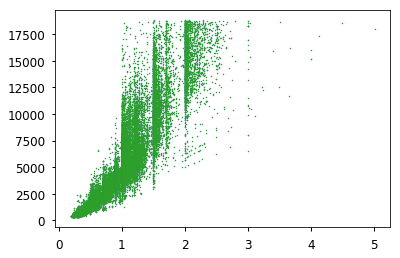

In [35]:
fig, ax = plt.subplots()
ax.scatter('carat', 'price', data=diamonds, s=1)
plt.scatter('carat', 'price', data=diamonds, s=1, alpha=0.1)
plt.scatter('carat', 'price', data=diamonds, s=1)

In [36]:
plt.hexbin

<function matplotlib.pyplot.hexbin(x, y, C=None, gridsize=100, bins=None, xscale='linear', yscale='linear', extent=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors='face', reduce_C_function=<function mean at 0x7f6d880c9e18>, mincnt=None, marginals=False, hold=None, data=None, **kwargs)>

In [37]:
plt.hexbin()'carat', 'price', data=diamonds, mincnt=1, gridsize=80);
plt.colorbar()

SyntaxError: invalid syntax (<ipython-input-37-2790cd6c12e8>, line 1)

In [ ]:
plt.scatter('carat', 'price', data=diamonds, s=1)
plt.hexbin('weight', 'hindfoot_length', data=rodents, mincnt=1, gridsize=50);

In [ ]:
g = sns.FacetGrid(rodents)
g.map(plt.scatter, 'weight', 'hindfoot_length', s=10)


In [ ]:
{k:[plt.rcParamsDefault[k], base_context[k]] for k in sorted(base_context.keys())}

In [ ]:
       base_context = {

            "font.size": 12,
            "axes.labelsize": 11,
            "axes.titlesize": 12,
            "xtick.labelsize": 10,
            "ytick.labelsize": 10,
            "legend.fontsize": 10,

            "grid.linewidth": 1,
            "lines.linewidth": 1.75,
            "patch.linewidth": .3,
            "lines.markersize": 7,
            "lines.markeredgewidth": 0,

            "xtick.major.width": 1,
            "ytick.major.width": 1,
            "xtick.minor.width": .5,
            "ytick.minor.width": .5,

            "xtick.major.pad": 7,
"ytick.major.pad": 7,}

In [ ]:
# TODO Save these two plots for a later lecture to explain when they are not appropriate.
sns.swarmplot(x='weight', y='plot_type', data=surveys_common.sample(5000), size=2)

In [ ]:
sns.stripplot(x='weight', y='plot_type', data=surveys_common)

In [ ]:
sns.stripplot(x='weight', y='plot_type', data=surveys_common, jitter=True, size=3)

In [ ]:
# To display plots in the notebook rather than in a new window
%matplotlib inline 
surveys.plot(kind='scatter', x='weight', y='hindfoot_length')

This is one of the easiest ways of making plots and for many purposes it is perfectly fine. You can also use it to customize properties of the plot.

In [ ]:
ax = surveys.plot(kind='scatter', x='weight', y='hindfoot_length')
ax.set_title('Scatter plot', fontsize=18)
ax.set_xlabel('Weight')
ax.set_ylabel('Hindfoot length')